Name: Arkajyoti Chakraborty


College: Delhi Technological University(DTU)

Branch: Engineering Physics

In [ ]:
# Don't go by the name as its a classification model not a regression model. 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/ArkajyotiChakraborty/Logistic_regression/master/titanic_train.csv'
train = pd.read_csv(url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull() # this gives true for the results which are null 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# below we will be seeing some types of plots these are basically we are playing with the data and visualizing it. As this is for rookies we will be seeing these interesting plots and try to read and understand them.

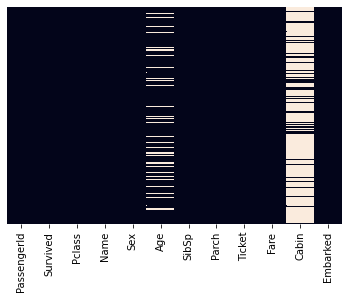

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False) # here the purpose of using heatmap is to see that which data is missing and for False values we can see that the discontinues lines bt the yellow lines. this is mainly analysing the data at visual level and hence witnessing the fact that the there are some points missing in the data that is given to us and hence we will be solving these problems later of filling the data.

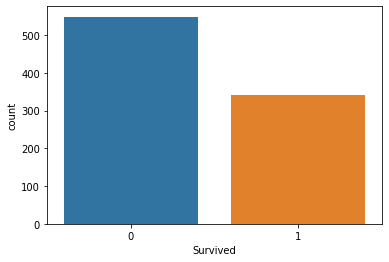

In [ ]:
# for now let us look at 2 more plots to analyse the data 
sns.countplot(x='Survived', data=train) # taking a counter plot of the number of ppl survived as the probality is 0 or 1. Here 0 is for those who didn't survived and 1 for those who survived. 


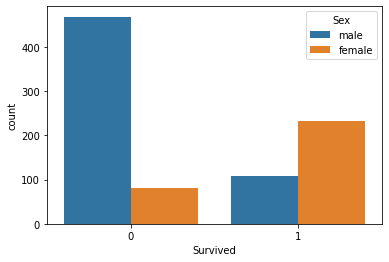

In [ ]:
sns.countplot(x='Survived',hue = 'Sex', data=train)

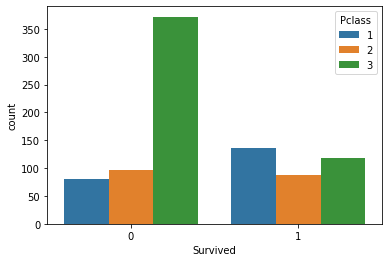

In [ ]:
sns.countplot(x='Survived',hue = 'Pclass', data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


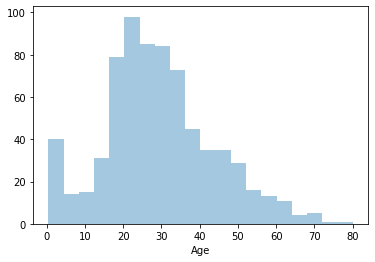

In [ ]:
sns.distplot(train['Age'].dropna(),kde = False)

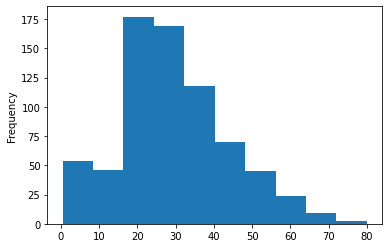

In [ ]:
train['Age'].plot.hist()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


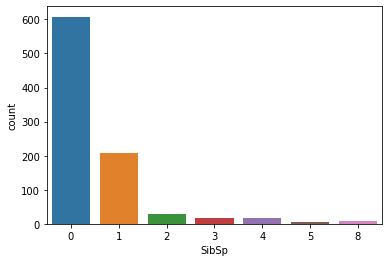

In [6]:
# exploring the Sibsp column 
sns.countplot(x='SibSp', data=train)
# this basically shows that the most of the people not have any sibblings or children.

In [ ]:
# Now we start with data preprocessing so that we can make our data clean and work on it.(if wanna try more visualisation tools then go on by yourself).

In [9]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age        

In [11]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# above the fucntion we created is to fill the Age date where the data was missing. Now how we do we check that actually our function works for that we use the visualisations tools that is time for seaborn again here.


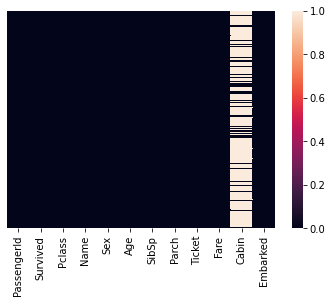

In [12]:
sns.heatmap(train.isnull(),yticklabels=False) # clearly no more missing data in the age column.

In [ ]:
# here we see that cabin col is something we dont need in our model for long run hence we can discard it. Now this is what we call as cleaning the data as working on a cleaned and perfect data is essential.

In [15]:
train.drop('Cabin', axis=1,inplace=True)

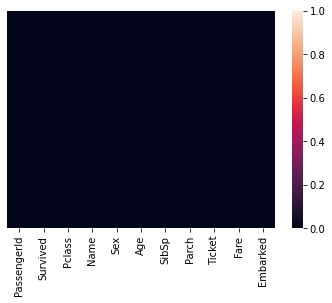

In [16]:
sns.heatmap(train.isnull(),yticklabels=False) # confirming the column is being removed and now this looks good and perfect to work.

In [ ]:
#till this the data processing was about the filling the missing values and droping the useless column.
# now we will work on making categorical data from the given data set so that our algorithm can work on that.
# basically creating summy variables for the col that we want to work on from the given data set and so that our ML algo can work on it directly.


In [17]:
pd.get_dummies(train['Sex']) # here u see our ML algo can't be worked on the string values of Male and female but using the get_dummies method in the pandas we can actually work and transform the value in 0 or 1. Now we can work on this type of dataset.

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
# droping the first row as if we know the value of the fisrt col we can predict the values of 2nd col.
sex=pd.get_dummies(train['Sex'], drop_first=True)
sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   male    891 non-null    uint8
dtypes: uint8(1)
memory usage: 1019.0 bytes


In [22]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head() 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [36]:
# now as we have managed to get the data that is of our use in useable form we will clean up the other columns.

In [38]:
x = train.drop('Survived',axis=1)
y = train['Survived']

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic_model = LogisticRegression() # creating object.

In [47]:
logistic_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
prediction = logistic_model.predict(X_test)

In [ ]:
# for accuracy and stuff 

In [50]:
from sklearn.metrics import classification_report 

In [51]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

